# Predictive modelling on consumer buying behaviour or sales for online shopping

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

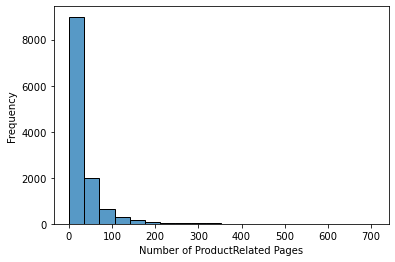

In [1]:
# Retrieve the consumer_behaviour_analysis notebook
%run ./consumer_behaviour_analysis.ipynb

### Identifying class imbalance 

In [2]:
class_distribution = df['Revenue'].value_counts(normalize=True)
print(class_distribution)


False    0.845255
True     0.154745
Name: Revenue, dtype: float64


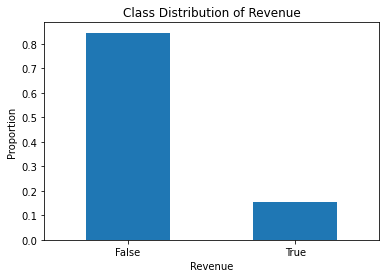

In [3]:

# Visualizing class proportions
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


As observed, the proportion of 'False' in Revenue is significantly higher than 'True'. Therefore, we have to address it appropriately to ensure that our model doesn't become biased towards the majority class. Here, we have implemented oversampling using the Synthetic Minority Over-sampling Technique (SMOTE) technique and train a logistic regression model with class weighting.

### Implementation of logistic regression model with class weighting

In [4]:
# Import required modules
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

In [5]:
# Assign X and y with features and target variable
X = df[['ProductRelated', 'PageValues']]
y = df['Revenue']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[False, True], y=y_train_resampled)

# Train logistic regression model with class weights
model = LogisticRegression(class_weight={False: class_weights[0], True: class_weights[1]})
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8746958637469586
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.90      0.92      2055
        True       0.60      0.74      0.66       411

    accuracy                           0.87      2466
   macro avg       0.77      0.82      0.79      2466
weighted avg       0.89      0.87      0.88      2466



### Insights from the claasification report and how effective the model can be for future predictions

The insights gleaned from the classification report offer valuable insights into consumer sales and the predictive capabilities of the model concerning revenue generation. 

#### Accuracy:

- The overall accuracy of the model is 0.87, indicating that it correctly predicted the class labels for 87% of the instances in the test set.


#### Precision:

- The precision score of 0.95 for the "False" class (non-revenue-generating visits) signifies that when the model anticipates a visit won't culminate in a sale, it is correct 95% of the time. This underscores its robust ability to discern instances where consumers engage with the website without making purchases.
- Conversely, the precision score of 0.60 for the "True" class (revenue-generating visits) suggests a lower precision in identifying instances of consumer purchases. This implies the existence of false positive predictions, where non-sales visits are incorrectly identified as revenue-generating.


#### Recall:

- With a recall score of 0.90 for the "False" class, the model accurately identifies 90% of instances where consumers refrain from making purchases. This indicates the model's efficacy in capturing the majority of non-sales visits.
- The moderate recall score of 0.74 for the "True" class indicates that the model successfully identifies 74% of instances where consumers make purchases. While significant, this suggests potential for improvement in capturing more sales visits.


#### F1-Score:

- The high F1-score of 0.92 for the "False" class signifies a balanced precision-recall trade-off for non-sales visits, indicating strong overall performance in identifying these instances.
- Conversely, the lower F1-score of 0.66 for the "True" class suggests a slightly less balanced precision-recall trade-off for sales visits compared to non-sales visits. This highlights a potential trade-off between precision and recall in predicting revenue generation.

### Conclusion

The logistic regression model, trained on consumer behavior data, yields valuable insights into revenue generation and consumer purchasing patterns. Through an examination of features such as the number of product-related pages visited and page values, the model accurately predicts the likelihood of purchase during individual website sessions. Its ability to discern between browsing and purchasing behavior is underscored by its high precision in identifying non-sales visits. However, there remains room for improvement in capturing all instances of revenue generation, as indicated by its moderate recall for sales visits. Nevertheless, the model furnishes actionable insights for businesses, encompassing revenue forecasting, customer segmentation, identification of revenue drivers, optimization of marketing endeavors, and enhancements to website functionality. By capitalizing on these insights, businesses can tailor their strategies to capitalize on sales opportunities, enhance user experiences, and foster sustainable growth.